In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, \
    Ridge, Lasso, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error, \
    mean_absolute_error, PredictionErrorDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [8]:
boston = pd.read_csv('Boston.csv')
X = boston.drop('MEDV',axis=1)
y = boston['MEDV']

In [10]:
X.shape

(506, 13)

In [12]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [14]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<Axes: xlabel='RM', ylabel='MEDV'>

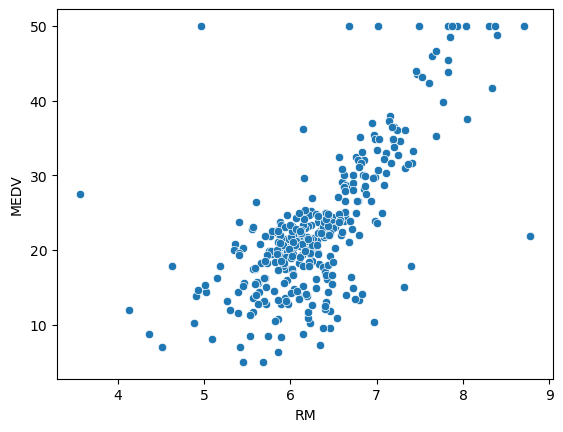

In [23]:
sns.scatterplot(x=X_train['RM'], y=y_train)

In [25]:
def evaluate(y_test,y_pred):
    # Explained variance score: 1 is perfect prediction
    print(f'R^2: {r2_score(y_test,y_pred):.2f}')
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test,y_pred):.2f}")

In [27]:
def print_linear_regr(model,X_train):
    print(f"Intercept: {model.intercept_}")
    print(pd.DataFrame(zip(X_train.columns, model.coef_),
                       columns=['features', 'estimatedCoeffs']))

In [29]:
def holdout_performance(model,X_test,y_test,plot=False):
    y_pred = model.predict(X_test)
    
    print("\nHoldout estimation")
    evaluate(y_test,y_pred)
    if plot:
        display = PredictionErrorDisplay.from_predictions(\
                  y_true=y_test, y_pred=y_pred,\
                  kind="actual_vs_predicted")
        display.plot()

In [31]:
def linear_regr(model,X_train,y_train,X_test,y_test,plot=False):
    print("\nLinear Regression")
    print("=========================")
    model.fit(X_train,y_train)
    print_linear_regr(model,X_train)
    holdout_performance(model,X_test,y_test,plot)

In [33]:
# Ordinary least-squares Linear Regression
lm = LinearRegression()


Linear Regression
Intercept: -35.99434897818352
  features  estimatedCoeffs
0       RM         9.311328

Holdout estimation
R^2: 0.44
RMSE: 6.86
MAE: 4.47


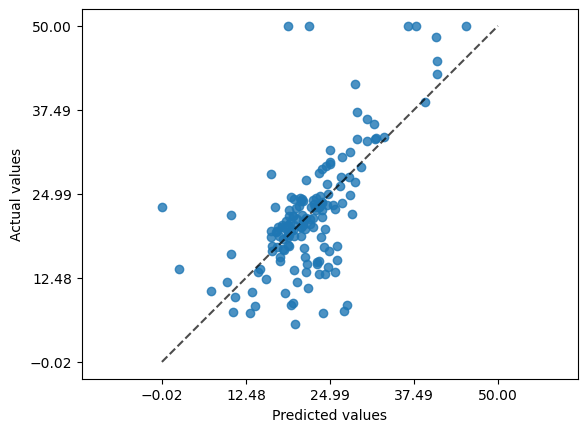

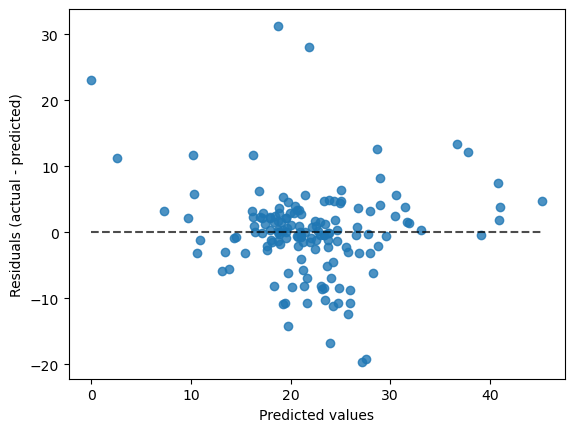

In [37]:
linear_regr(lm, X_train[['RM']], y_train, X_test[['RM']], y_test, plot=True)


Linear Regression
Intercept: -30.89648178869281
  features  estimatedCoeffs
0       RM         8.658377
1     CRIM        -0.291450

Holdout estimation
R^2: 0.47
RMSE: 6.65
MAE: 4.29


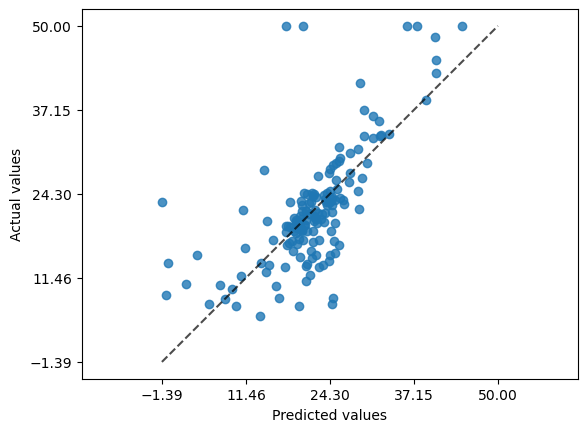

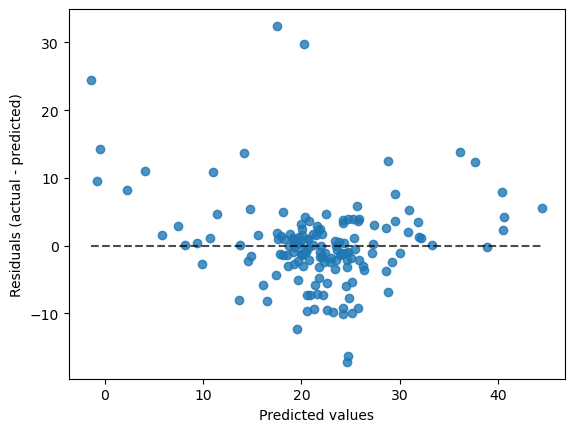

In [39]:
linear_regr(lm, X_train[['RM','CRIM']], y_train, X_test[['RM','CRIM']], y_test, plot=True)


Linear Regression
Intercept: 37.93710774183309
   features  estimatedCoeffs
0      CRIM        -0.121310
1        ZN         0.044466
2     INDUS         0.011342
3      CHAS         2.511246
4       NOX       -16.231253
5        RM         3.859068
6       AGE        -0.009985
7       DIS        -1.500270
8       RAD         0.242143
9       TAX        -0.011072
10  PTRATIO        -1.017753
11        B         0.006814
12    LSTAT        -0.486738

Holdout estimation
R^2: 0.67
RMSE: 5.21
MAE: 3.61


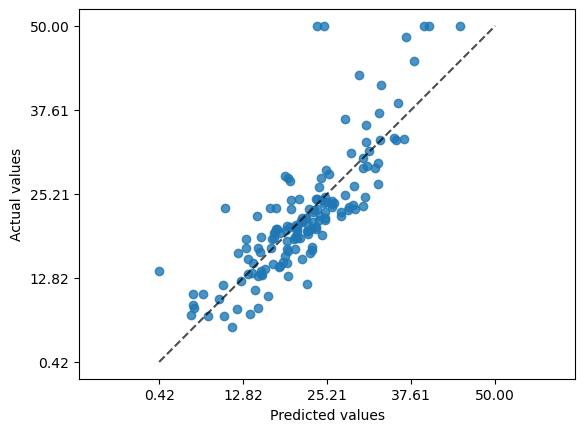

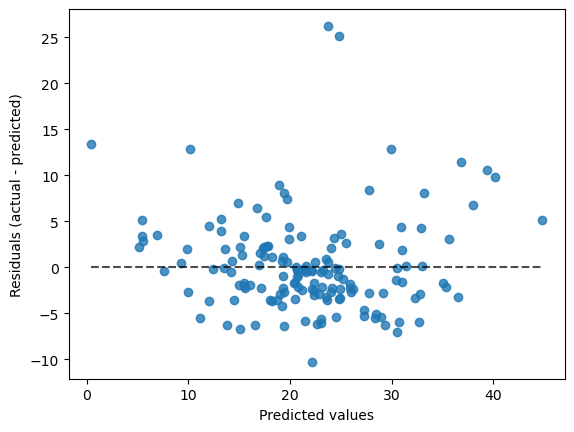

In [41]:
linear_regr(lm, X_train, y_train, X_test, y_test, plot=True)

In [43]:
lm_ridge = Ridge(alpha=10)

In [45]:
linear_regr(lm_ridge, X_train, y_train, X_test, y_test)


Linear Regression
Intercept: 30.451937175666828
   features  estimatedCoeffs
0      CRIM        -0.116008
1        ZN         0.048609
2     INDUS        -0.047175
3      CHAS         1.785961
4       NOX        -1.540350
5        RM         3.620640
6       AGE        -0.021636
7       DIS        -1.309680
8       RAD         0.211507
9       TAX        -0.012664
10  PTRATIO        -0.876398
11        B         0.007688
12    LSTAT        -0.524099

Holdout estimation
R^2: 0.66
RMSE: 5.35
MAE: 3.65


In [47]:
lm_lasso = Lasso(alpha=10)

In [49]:
linear_regr(lm_lasso, X_train, y_train, X_test, y_test)


Linear Regression
Intercept: 31.50559099984182
   features  estimatedCoeffs
0      CRIM        -0.000000
1        ZN         0.031050
2     INDUS        -0.000000
3      CHAS         0.000000
4       NOX         0.000000
5        RM         0.000000
6       AGE         0.000000
7       DIS        -0.000000
8       RAD         0.000000
9       TAX        -0.010997
10  PTRATIO        -0.000000
11        B         0.006235
12    LSTAT        -0.559179

Holdout estimation
R^2: 0.48
RMSE: 6.56
MAE: 4.39


In [51]:
lm_sgd = SGDRegressor()

In [53]:
linear_regr(lm_sgd, X_train, y_train, X_test, y_test)


Linear Regression
Intercept: [5.694863e+10]
   features  estimatedCoeffs
0      CRIM     6.049194e+11
1        ZN     1.841522e+11
2     INDUS    -4.834792e+11
3      CHAS     2.690272e+10
4       NOX     1.924078e+10
5        RM     1.876303e+11
6       AGE    -1.363511e+11
7       DIS     4.310620e+11
8       RAD     5.008946e+11
9       TAX     2.939668e+10
10  PTRATIO     7.330973e+11
11        B     4.701957e+10
12    LSTAT     1.923592e+11

Holdout estimation
R^2: -23191957563233252396761088.00
RMSE: 43944168903576.56
MAE: 42510957746891.43


In [57]:
sc = StandardScaler()
train_sc = sc.fit(X_train)
X_train_sc = pd.DataFrame(train_sc.transform(X_train), columns= X_train.columns)
X_train_sc.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,-1.505387e-17,3.010774e-17,-5.519753e-17,-5.017957e-18,-1.655926e-16,-5.419394e-16,8.938236e-17,2.258081e-17,3.261672e-17,-1.731195e-16,4.767059e-16,-1.003591e-17,-3.663109e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-4.018459e-01,-4.999792e-01,-1.520455e+00,-2.636027e-01,-1.482176e+00,-3.919205e+00,-2.360604e+00,-1.253553e+00,-9.645908e-01,-1.260821e+00,-2.643715e+00,-4.213769e+00,-1.515269e+00
25%,-3.938011e-01,-4.999792e-01,-8.775506e-01,-2.636027e-01,-9.190995e-01,-5.893965e-01,-8.507175e-01,-8.014615e-01,-6.181601e-01,-7.383712e-01,-4.831722e-01,1.807736e-01,-8.071961e-01
50%,-3.711149e-01,-4.999792e-01,-3.606501e-01,-2.636027e-01,-1.567805e-01,-1.325598e-01,3.734422e-01,-2.648077e-01,-5.026833e-01,-5.329134e-01,2.820200e-01,3.626138e-01,-1.811775e-01
75%,-3.052051e-02,3.467743e-01,1.005342e+00,-2.636027e-01,6.336923e-01,4.833317e-01,8.841784e-01,6.377762e-01,1.691377e+00,1.551016e+00,7.771443e-01,4.103910e-01,6.050594e-01
max,1.026419e+01,3.733788e+00,2.385652e+00,3.793587e+00,2.727904e+00,3.525700e+00,1.107402e+00,4.050895e+00,1.691377e+00,1.815176e+00,1.587348e+00,4.245429e-01,3.471659e+00


In [59]:
X_test_sc = pd.DataFrame(train_sc.transform(X_test), columns= X_test.columns)
X_test_sc.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.101863,-0.062815,0.027656,0.056702,-0.040466,-0.112983,-0.049837,0.052535,0.075461,0.126135,-0.026840,-0.152902,0.100038
std,1.097513,0.955822,0.939228,1.097665,1.012134,1.003146,1.016954,1.064002,1.016264,0.958093,0.911543,1.205053,1.030528
min,-0.401032,-0.499979,-1.480363,-0.263603,-1.421537,-3.488402,-2.249885,-1.275153,-0.964591,-1.254951,-2.643715,-4.187103,-1.488389
25%,-0.391394,-0.499979,-0.747252,-0.263603,-0.936425,-0.614004,-0.878397,-0.838052,-0.618160,-0.579875,-0.674470,0.119605,-0.659710
50%,-0.375123,-0.499979,-0.168781,-0.263603,-0.278058,-0.216010,0.203792,-0.300357,-0.502683,-0.104387,0.101975,0.354485,-0.062340
75%,0.190823,-0.499979,1.005342,-0.263603,0.523243,0.293964,0.946681,0.837511,1.691377,1.551016,0.777144,0.424543,0.684638
max,8.412937,3.522100,2.385652,3.793587,2.727904,3.447243,1.107402,3.364998,1.691377,1.815176,1.227257,0.424543,3.611717


In [61]:
linear_regr(lm, X_train_sc, y_train, X_test_sc, y_test)


Linear Regression
Intercept: 22.7454802259887
   features  estimatedCoeffs
0      CRIM        -1.011901
1        ZN         1.050280
2     INDUS         0.079210
3      CHAS         0.618962
4       NOX        -1.873691
5        RM         2.705270
6       AGE        -0.279573
7       DIS        -3.097665
8       RAD         2.096900
9       TAX        -1.886063
10  PTRATIO        -2.261105
11        B         0.582643
12    LSTAT        -3.440498

Holdout estimation
R^2: 0.67
RMSE: 5.21
MAE: 3.61


In [63]:
linear_regr(lm_ridge, X_train_sc, y_train, X_test_sc, y_test)


Linear Regression
Intercept: 22.7454802259887
   features  estimatedCoeffs
0      CRIM        -0.933398
1        ZN         0.901779
2     INDUS        -0.130099
3      CHAS         0.653141
4       NOX        -1.554675
5        RM         2.780153
6       AGE        -0.318141
7       DIS        -2.751812
8       RAD         1.470846
9       TAX        -1.327215
10  PTRATIO        -2.183673
11        B         0.586609
12    LSTAT        -3.297412

Holdout estimation
R^2: 0.67
RMSE: 5.26
MAE: 3.61


In [65]:
linear_regr(lm_lasso, X_train_sc, y_train, X_test_sc, y_test)


Linear Regression
Intercept: 22.7454802259887
   features  estimatedCoeffs
0      CRIM             -0.0
1        ZN              0.0
2     INDUS             -0.0
3      CHAS              0.0
4       NOX             -0.0
5        RM              0.0
6       AGE             -0.0
7       DIS              0.0
8       RAD             -0.0
9       TAX             -0.0
10  PTRATIO             -0.0
11        B              0.0
12    LSTAT             -0.0

Holdout estimation
R^2: -0.01
RMSE: 9.15
MAE: 6.62


In [67]:
linear_regr(lm_sgd, X_train_sc, y_train, X_test_sc, y_test)


Linear Regression
Intercept: [22.74252683]
   features  estimatedCoeffs
0      CRIM        -0.959650
1        ZN         0.955656
2     INDUS        -0.154979
3      CHAS         0.645369
4       NOX        -1.699015
5        RM         2.786825
6       AGE        -0.352110
7       DIS        -2.999743
8       RAD         1.501647
9       TAX        -1.281719
10  PTRATIO        -2.222391
11        B         0.579975
12    LSTAT        -3.405375

Holdout estimation
R^2: 0.67
RMSE: 5.25
MAE: 3.63


In [69]:
pipe_lm = Pipeline([('scaler', StandardScaler()), ('lm', LinearRegression())])
pipe_lm.fit(X_train,y_train)
pipe_lm.steps

[('scaler', StandardScaler()), ('lm', LinearRegression())]

In [71]:
print_linear_regr(pipe_lm['lm'], X_train)

Intercept: 22.7454802259887
   features  estimatedCoeffs
0      CRIM        -1.011901
1        ZN         1.050280
2     INDUS         0.079210
3      CHAS         0.618962
4       NOX        -1.873691
5        RM         2.705270
6       AGE        -0.279573
7       DIS        -3.097665
8       RAD         2.096900
9       TAX        -1.886063
10  PTRATIO        -2.261105
11        B         0.582643
12    LSTAT        -3.440498


In [73]:
y_pred = pipe_lm.predict(X_test)
evaluate(y_test,y_pred)

R^2: 0.67
RMSE: 5.21
MAE: 3.61


In [75]:
#lm_ridge = Ridge()
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
ridge_params = {'ridge__alpha':[0.001,0.005,0.01,0.1,0.5,1,1.5,5,10],\
                'ridge__tol':[1e-06,5e-06,1e-05,5e-05]}
grid_search_ridge = GridSearchCV(pipe_ridge, ridge_params,\
                    verbose=True, scoring='neg_mean_squared_error')

In [77]:
grid_search_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.005, 0.01, 0.1, 0.5, 1, 1.5,
                                          5, 10],
                         'ridge__tol': [1e-06, 5e-06, 1e-05, 5e-05]},
             scoring='neg_mean_squared_error', verbose=True)

In [79]:
grid_search_ridge.best_params_

{'ridge__alpha': 10, 'ridge__tol': 1e-06}

In [81]:
grid_search_ridge.best_score_

-22.767376507476634

In [89]:
# grid_search_ridge.cv_results_

In [85]:
grid_search_ridge.best_estimator_.fit(X_train_sc,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10, tol=1e-06))])

In [87]:
holdout_performance(grid_search_ridge.best_estimator_,X_test_sc,y_test)


Holdout estimation
R^2: 0.67
RMSE: 5.26
MAE: 3.61


In [91]:
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
lasso_params = {'lasso__alpha':[0.001,0.005,0.01,0.1,0.5,1,1.5,5,10],\
                'lasso__tol':[1e-06,5e-06,1e-05,5e-05]}
grid_search_lasso = GridSearchCV(pipe_lasso,lasso_params)

In [93]:
grid_search_lasso.fit(X_train,y_train)
grid_search_lasso.best_params_

{'lasso__alpha': 0.01, 'lasso__tol': 5e-05}

In [95]:
pipe_sgd = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor())])
sgd_params = {'sgd__max_iter' :[100,1000,10000],
              'sgd__alpha':[1e-05,0.001,0.005,0.01,0.1,0.5,1,1.5,5,10],
              'sgd__learning_rate': ['constant','optimal','invscaling','adaptive']}
grid_search_sgd = GridSearchCV(pipe_sgd,sgd_params)

In [99]:
# grid_search_sgd.fit(X_train,y_train)
# grid_search_sgd.best_params_

In [101]:
rt_params = {'max_depth':[5,10,15,20],\
            'min_impurity_decrease':[0,0.01,0.05],\
            'criterion': ['squared_error','friedman_mse','absolute_error', 'poisson']}
grid_search_rt = GridSearchCV(DecisionTreeRegressor(),rt_params)

In [103]:
grid_search_rt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 15, 20],
                         'min_impurity_decrease': [0, 0.01, 0.05]})

In [105]:
grid_search_rt.best_params_

{'criterion': 'poisson', 'max_depth': 5, 'min_impurity_decrease': 0}

In [109]:
# plot_tree(grid_search_rt.best_estimator_)

In [111]:
holdout_performance(grid_search_rt.best_estimator_,X_test,y_test)


Holdout estimation
R^2: 0.71
RMSE: 4.92
MAE: 3.14


In [113]:
grid_search_rt.best_estimator_.tree_.compute_feature_importances()

array([0.07631448, 0.        , 0.00304996, 0.        , 0.        ,
       0.2097431 , 0.00202808, 0.00666104, 0.        , 0.01624258,
       0.02357077, 0.0049242 , 0.65746578])